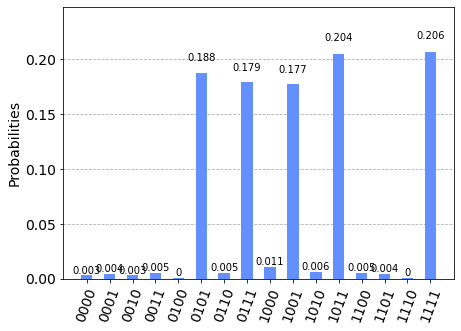

In [1]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem, Grover
from qiskit import Aer
from qiskit.circuit.library import PhaseOracle
from qiskit.visualization import plot_histogram

# the state we desire to find
good_state = ['0101', '0111', '1001', '1011', '1111']

#https://qiskit.org/textbook/ch-algorithms/quantum-counting.html
oracle = QuantumCircuit(4)
# # Oracle
# oracle.h([2,3])
# oracle.ccx(0,1,2)
# oracle.h(2)
# oracle.x(2)
# oracle.ccx(0,2,3)
# oracle.x(2)
# oracle.h(3)
# oracle.x([1,3])
# oracle.h(2)
# oracle.mct([0,1,3],2)
# oracle.x([1,3])
# oracle.h(2)

pOracle = PhaseOracle('x0 & ~x1 & x2 & ~x3 | x0 & x1 & x2 & ~x3 | x0 & ~x1 & ~x2 & x3| x0 & x1 & ~x2 & x3 | x0 & x1 & x2 & x3 ')

oracle.append(pOracle.to_gate(), [0,1,2,3])

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)


aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
answer = result.circuit_results
plot_histogram(answer)